# Support Vector Classifier  Exam

## Introducing the database

#### The database for this example is taken from https://archive-beta.ics.uci.edu/ml/datasets/predict+students+dropout+and+academic+success

#### We usually modify these databases slightly such that they fit the purpose of the course. Therefore, we suggest you use the database provided in the platform to obtain the same results.

# Library imports

In [38]:
import pandas as pd #for reading the data
from sklearn.preprocessing import MinMaxScaler #for data standardization
from sklearn.model_selection import train_test_split #to split the data into train and test parts
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder #to encode the data to numerical
from sklearn import svm, datasets
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, \
f1_score, classification_report, cohen_kappa_score, matthews_corrcoef, log_loss, \
ConfusionMatrixDisplay
from sklearn.model_selection import GridSearchCV #for cross validation
from sklearn.metrics import classification_report #for cross validation
import matplotlib.pyplot as plt
import seaborn as sns

## Loading the database

#### Read the csv file and study the database

In [56]:
data = pd.read_csv("student_dropout.csv", dtype = str)
data.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.66666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.4,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13,0,13.9,-0.3,0.79,Graduate


#### Check target class distribution and check for missing values

In [57]:
data.isnull().sum()

Marital status                                    0
Application mode                                  0
Application order                                 0
Course                                            0
Daytime/evening attendance\t                      0
Previous qualification                            0
Previous qualification (grade)                    0
Nacionality                                       0
Mother's qualification                            0
Father's qualification                            0
Mother's occupation                               0
Father's occupation                               0
Admission grade                                   0
Displaced                                         0
Educational special needs                         0
Debtor                                            0
Tuition fees up to date                           0
Gender                                            0
Scholarship holder                                0
Age at enrol

In [58]:
data.columns

Index(['Marital status', 'Application mode', 'Application order', 'Course',
       'Daytime/evening attendance\t', 'Previous qualification',
       'Previous qualification (grade)', 'Nacionality',
       'Mother's qualification', 'Father's qualification',
       'Mother's occupation', 'Father's occupation', 'Admission grade',
       'Displaced', 'Educational special needs', 'Debtor',
       'Tuition fees up to date', 'Gender', 'Scholarship holder',
       'Age at enrollment', 'International',
       'Curricular units 1st sem (credited)',
       'Curricular units 1st sem (enrolled)',
       'Curricular units 1st sem (evaluations)',
       'Curricular units 1st sem (approved)',
       'Curricular units 1st sem (grade)',
       'Curricular units 1st sem (without evaluations)',
       'Curricular units 2nd sem (credited)',
       'Curricular units 2nd sem (enrolled)',
       'Curricular units 2nd sem (evaluations)',
       'Curricular units 2nd sem (approved)',
       'Curricular units 2nd

In [5]:
data.shape

(4424, 37)

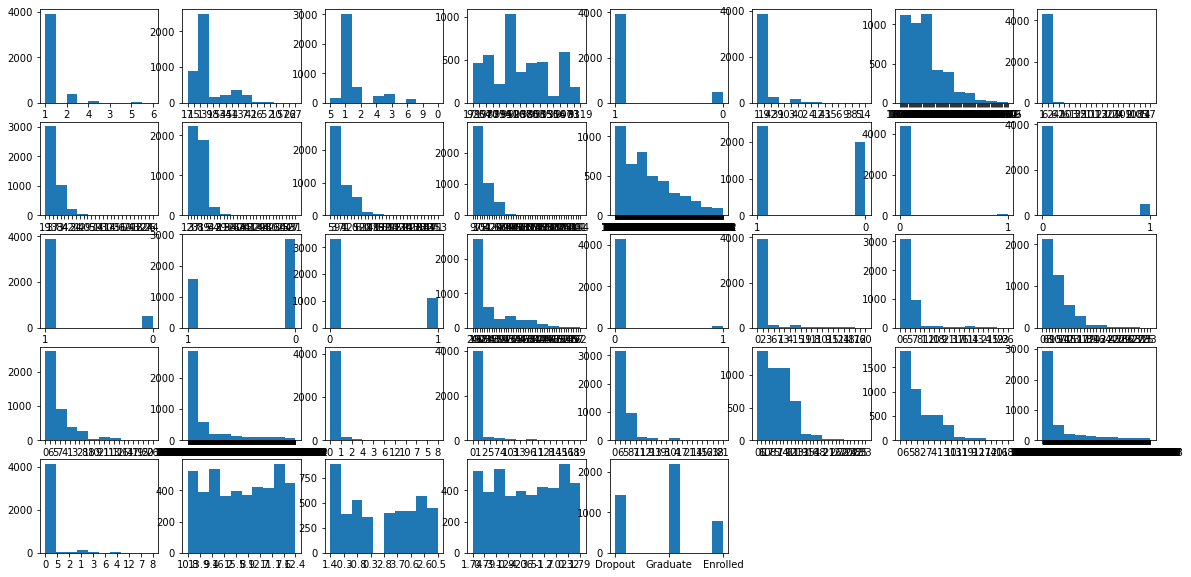

In [37]:
plt.figure(figsize=(20,10))
for i in range(37):
    plt.subplot(5,8,i+1)
    plt.hist(data.iloc[:,i])

<AxesSubplot:xlabel='Marital status', ylabel='count'>

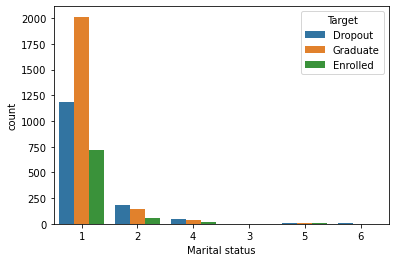

In [59]:
sns.countplot(data=data,x='Marital status',hue='Target')

<AxesSubplot:xlabel='Target', ylabel='count'>

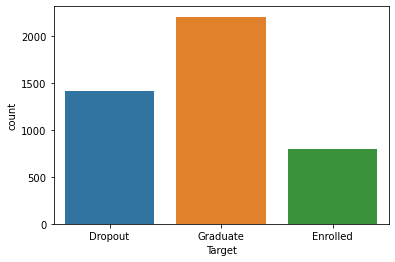

In [77]:
sns.countplot(data=data,x="Target")


In [55]:
data['Nacionality']

0         1
1         1
2         1
3         1
4         1
       ... 
4419      1
4420    105
4421      1
4422      1
4423     22
Name: Nacionality, Length: 4424, dtype: object

## Preprocessing

#### Define the target and the inputs

In [6]:
target=data.iloc[:,-1]
inputs=data.iloc[:,:36]


#### Create a training and a testing dataset

In [7]:
x_train,x_test,y_train,y_test=train_test_split(inputs,target,test_size=0.5,random_state=365,stratify=target)

#### Define an encoder for the target 

In [8]:
enc_t = LabelEncoder()

#### Apply the fit_transform() method on the training data and the transform() method on the test data.

In [9]:
y_train_scale=enc_t.fit_transform(y_train)
y_test_scale=enc_t.transform(y_test)

In [25]:
y_train[:10]

3172     Dropout
2820    Graduate
4291    Graduate
3482     Dropout
903     Graduate
3134    Enrolled
3217    Graduate
1059    Graduate
1764    Graduate
974     Graduate
Name: Target, dtype: object

In [24]:
y_train_scale[:10]

array([0, 2, 2, 0, 2, 1, 2, 2, 2, 2])

### rescale to the range [-1, 1]

In [10]:
ran=MinMaxScaler(feature_range=(-1,1)).fit(x_train)
x_train=ran.transform(x_train)

### Choose a C value of 1

In [11]:
C = 1.0

## Classification

In [12]:
svc=svm.SVC(kernel='linear',C=C)

In [13]:
svc.fit(x_train,y_train_scale)

SVC(kernel='linear')

#### Evaluate the model on the test data

In [14]:
y_p_test=svc.predict(ran.transform(x_test))
confusion_matrix(y_test_scale,y_p_test)

array([[ 525,   83,  103],
       [  99,  124,  174],
       [  30,   52, 1022]], dtype=int64)

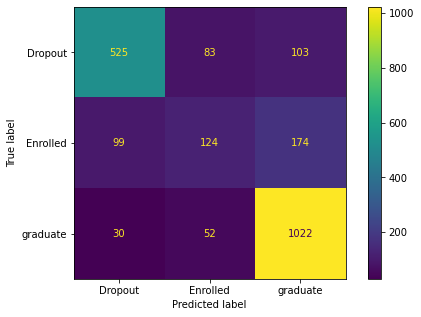

In [26]:

fig, ax = plt.subplots(figsize=(8, 5))

cmp = ConfusionMatrixDisplay(
    confusion_matrix(y_test_scale,y_p_test),
    display_labels=["Dropout" , 'Enrolled',"graduate"],
   
)

cmp.plot(ax=ax);

In [27]:
#classification report
print(classification_report(y_test_scale,y_p_test))

              precision    recall  f1-score   support

           0       0.80      0.74      0.77       711
           1       0.48      0.31      0.38       397
           2       0.79      0.93      0.85      1104

    accuracy                           0.76      2212
   macro avg       0.69      0.66      0.67      2212
weighted avg       0.74      0.76      0.74      2212



## Classification with different kernels

### Create and test the following svms with the respective kernels and C values


In [33]:
tune_parameter = [
    {'kernel': ['linear'], 'C': [1]},
    {'kernel': ['rbf'], 'gamma': [1e-3, 1e-4], 'C': [1, 10, 100]},
    {'kernel': ['sigmoid'], 'C': [1]},
    {'kernel': ['poly'], 'degree': [2, 3], 'C': [10, 100]}
]

gsc = GridSearchCV(svm.SVC(), tune_parameter, cv=5)
gsc.fit(x_train, y_train_scale)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid=[{'C': [1], 'kernel': ['linear']},
                         {'C': [1, 10, 100], 'gamma': [0.001, 0.0001],
                          'kernel': ['rbf']},
                         {'C': [1], 'kernel': ['sigmoid']},
                         {'C': [10, 100], 'degree': [2, 3],
                          'kernel': ['poly']}])

In [78]:
#classification report for each classifier

In [34]:
gsc.best_params_

{'C': 1, 'kernel': 'linear'}

In [35]:
gsc.cv_results_

{'mean_fit_time': array([0.07772465, 0.12733188, 0.14690504, 0.11192122, 0.13567104,
        0.09550939, 0.12396345, 0.13809862, 0.10227447, 0.12894011,
        0.31224146, 0.23511286]),
 'std_fit_time': array([0.00073191, 0.00225367, 0.00725571, 0.00719457, 0.00858207,
        0.00275143, 0.0027331 , 0.00617872, 0.01019308, 0.00911267,
        0.01364902, 0.00983719]),
 'mean_score_time': array([0.01508174, 0.0624176 , 0.06009402, 0.04492092, 0.05253429,
        0.04249916, 0.03275628, 0.01875343, 0.00904331, 0.01080351,
        0.01027141, 0.00955048]),
 'std_score_time': array([0.00182623, 0.0006549 , 0.00536406, 0.00714982, 0.00844329,
        0.00619268, 0.0027505 , 0.00626187, 0.00700462, 0.00299418,
        0.0054251 , 0.00779971]),
 'param_C': masked_array(data=[1, 1, 1, 10, 10, 100, 100, 1, 10, 10, 100, 100],
              mask=[False, False, False, False, False, False, False, False,
                    False, False, False, False],
        fill_value='?',
             dtype=ob